In [5]:
import pandas as pd

# Cargamos datos
import Loading_data 
from matplotlib import pyplot as plt    
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

from Loading_data import Get_Comunidades_List as comunidades
COMUNIDADES = comunidades()

def Get_Dimensions_All_CCAA(Atributos,media_movil ):
    array = []
    dias_a_considerar = 4 if media_movil else 1
    for ca in COMUNIDADES: 
        
        comunidad = Loading_data.Get_Comunidad(ca).head(dias_a_considerar)
        comunidad = comunidad.reset_index() # Resets the index, makes factor a column
        if media_movil : comunidad = pd.DataFrame(comunidad.mean(axis=0)).T 
        temp_dict = {}
        temp_dict['Lugar'] = ca
        for attr in Atributos:
            temp_dict[attr] = comunidad[attr].iloc[0]
        array.append(temp_dict)

    return pd.DataFrame.from_records(array)


In [6]:
array = []

    df = Loading_data.Get_Comunidad(ca).head(dias_a_considerar)
    comunidad = comunidad.reset_index() # Resets the index, makes factor a column
    if media_movil : comunidad = pd.DataFrame(comunidad.mean(axis=0)).T 
            

            df =  Get_Dimensions_All_CCAA(['Fallecidos'],media_movil=False) 

In [14]:
from Loading_data import Get_Comunidades_List as comunidades

dimension = 'Fallecidos'
array = [] 
COMUNIDADES = comunidades()
df_temp = pd.DataFrame()
    
for ca in COMUNIDADES:
    df_temp[ca] = Loading_data.Get_Comunidad(ca)[[dimension]]
    
df_temp

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [40]:
ca = 'Madrid'




In [84]:
def Debug_Get_Single_Dimension():
    dimension = 'Fallecidos hoy absoluto'
    df = Get_Single_Dimension(dimension)
    return df
#    Debug_Get_Single_Dimension()

,Madrid,Cataluña,Castilla La Mancha,Castilla y León,País Vasco,C. Valenciana,Andalucía,Aragón,Galicia,Navarra,Extremadura,La Rioja,Asturias,Baleares,Cantabria,Canarias,Murcia,Ceuta y Melilla
Fecha,,,,,,,,,,,,,,,,,,
2020-05-01,46,86,35,18,16,9,31,10,8,7,5,1,0,5,1,1,2,0
2020-04-30,71,70,27,16,22,18,19,3,0,3,6,2,7,3,0,1,0,0
2020-04-29,57,97,40,26,19,18,20,1,135,16,7,4,5,4,3,1,0,0
2020-04-28,62,109,31,20,14,11,11,9,7,0,5,6,8,2,2,2,2,0
2020-04-27,64,133,35,24,11,3,12,14,11,1,6,5,4,4,3,0,1,0
2020-04-26,74,68,38,27,18,14,14,3,6,2,6,4,10,1,1,1,1,0
2020-04-25,83,105,37,27,19,25,24,14,6,12,5,4,8,2,4,2,1,0
2020-04-24,81,50,67,30,26,23,28,14,7,8,4,4,8,4,5,7,1,0
2020-04-23,107,96,48,28,43,18,29,25,7,8,3,5,12,4,6,0,1,0


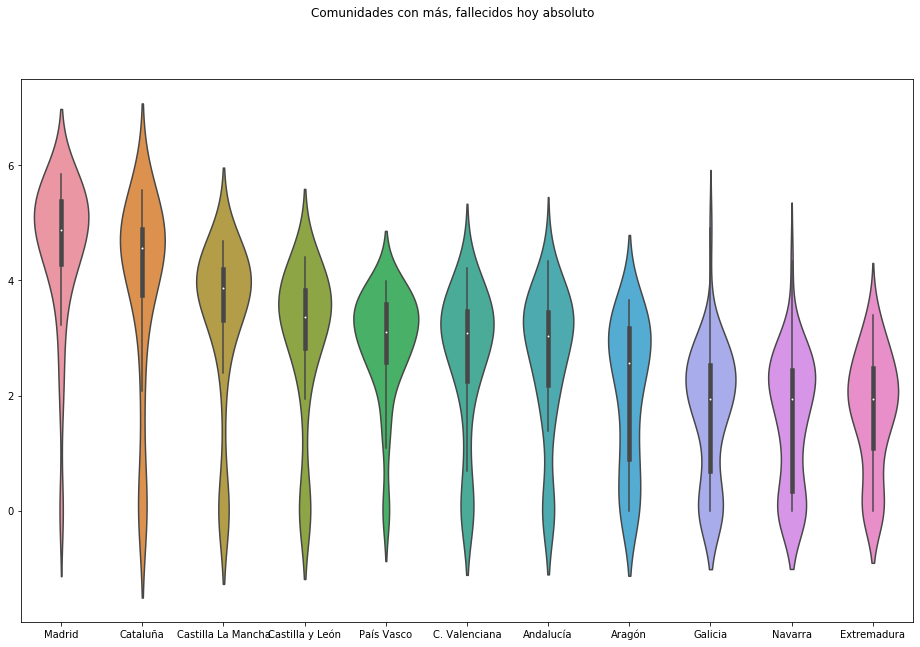

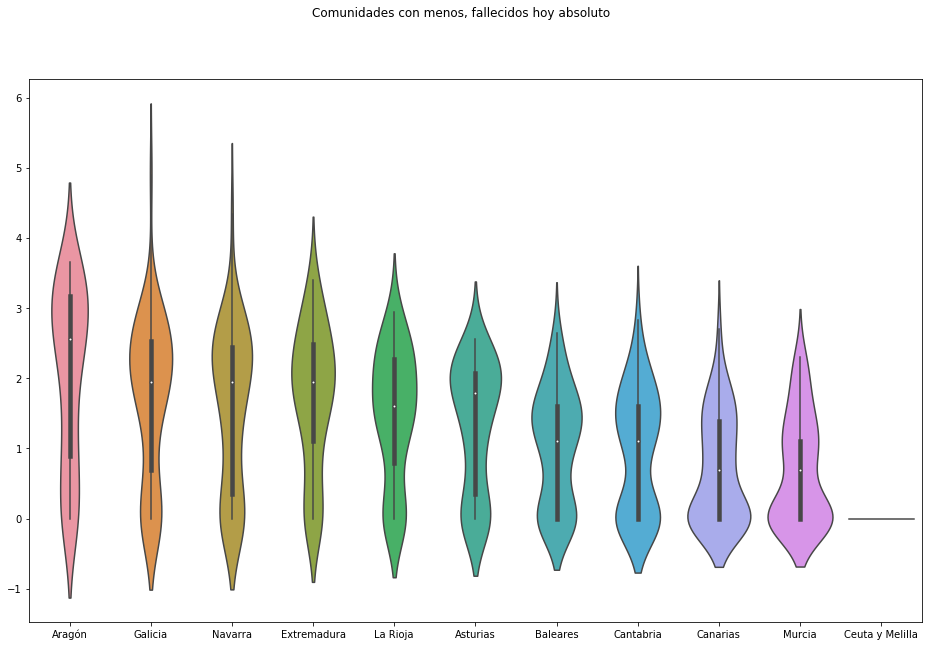

In [91]:
import numpy as np 
import seaborn as sns

def Get_Single_Dimension(dimension ):
    df = pd.DataFrame()
    df_tmp = pd.DataFrame()
    array = []
    #
    for ca in COMUNIDADES:
        df_tmp = Loading_data.Get_Comunidad(ca)
        new = df_tmp[[dimension]].copy()
        new.rename(columns={dimension: ca}, inplace=True)
        array.append(new)
    #
    df =  pd.concat(array, axis=1)
    return df

def plot_violin(dimension):
    """ Muestra la distribucion logaritmica por comunidades, de una dimension"""
    df = Get_Single_Dimension(dimension) 
    # Ordenamos comunidades 
    s = df.sum()
    df = df[s.sort_values(ascending=False).index[:]]

    # Pasamos a logaritmo
    df2 = np.log(df)
    df2.replace(-np.inf, 0, inplace=True)
    df2

    f, ax = plt.subplots()
    f.set_size_inches( 16, 10)
    f.suptitle("Comunidades con más, " + dimension.lower())

    sns.violinplot(data=df2.iloc[:,:-7])

    f, ax = plt.subplots()
    f.set_size_inches( 16, 10)
    f.suptitle("Comunidades con menos, " + dimension.lower())
    sns.violinplot(data=df2.iloc[:,7:])
    return df

dimension = 'Fallecidos hoy absoluto'
plot_violin(dimension)
df

In [86]:
COMUNIDAD_A_CONSIDERAR = 'Madrid'
comunidad = Loading_data.Get_Comunidad(COMUNIDAD_A_CONSIDERAR)
comunidad.head(10)


,Lugar,Casos,Casos hoy absoluto,Casos hoy variacion respecto ayer,Casos hoy porcentaje,Fallecidos,Fallecidos hoy absoluto,Fallecidos hoy variacion respecto ayer,Fallecidos hoy porcentaje,Tasa Mortalidad,Curados,Curados hoy absoluto,Casos excluidos curados,Proporcion Curados hoy absoluto / Casos hoy absoluto,UCI,Hospitalizados
Fecha,,,,,,,,,,,,,,,,
2020-05-02,Madrid,62073,244,-414,0.003931,8292,70,24,0.008442,0.133585,37530,376.0,24543,1.540984,3404,40457
2020-05-01,Madrid,61829,658,252,0.010642,8222,46,-25,0.005595,0.132980,37154,447.0,24675,0.679331,3392,40293
2020-04-30,Madrid,61171,406,-575,0.006637,8176,71,14,0.008684,0.133658,36707,393.0,24464,0.967980,3377,40076
2020-04-29,Madrid,60765,981,618,0.016144,8105,57,-5,0.007033,0.133383,36314,473.0,24451,0.482161,3355,39850
2020-04-28,Madrid,59784,363,68,0.006072,8048,62,-2,0.007704,0.134618,35841,276.0,23943,0.760331,3338,39634
2020-04-27,Madrid,59421,295,3679,0.004965,7986,64,-10,0.008014,0.134397,35565,198.0,23856,0.671186,3309,39472
2020-04-26,Madrid,59126,-3384,-4168,-0.057234,7922,74,-9,0.009341,0.133985,35367,465.0,23759,-0.137411,873,5892
2020-04-25,Madrid,62510,784,-455,0.012542,7848,83,2,0.010576,0.125548,34902,690.0,27608,0.880102,892,6183
2020-04-24,Madrid,61726,1239,-49,0.020073,7765,81,-26,0.010431,0.125798,34212,567.0,27514,0.457627,949,6601
